### Import Modules


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import nltk
import re
import string
import sklearn
import time

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tensorflow import keras
from keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from scipy.stats import uniform, randint

import import_ipynb
import capstone_functions_04
from capstone_functions_04 import save_plot_function, plot_learning_curve, learning_curve_function

### Import Vectorized Dataframes and clean_df for train test indices 

In [4]:
# tfidf csv
X_tfidf = pd.read_csv('../data/X_tfidf_full_df.csv')

# word2vec.csv
X_word2vec = pd.read_csv('../data/X_word2vec_full_df.csv')

# countvec.csv
X_count_vec = pd.read_csv('../data/X_cv_full_df.csv')

# clean_df csv 
clean_df = pd.read_csv('../data/cleaned_df_eda_01.csv')

# target variable csv
y = pd.read_csv('../data/y_labels.csv')

In [5]:
# assign y for train test split
y = y['fraudulent']

In [6]:
# train test split
train_indices, test_indices = train_test_split(clean_df.index, test_size=0.2, stratify=y, random_state=42) 

In [7]:
#splitting train and test based off of indices from original dataset

# tfidf train test split
X_tfidf_train = X_tfidf.loc[train_indices]
X_tfidf_test = X_tfidf.loc[test_indices]

# word2vec train test split
X_word2vec_train = X_word2vec.loc[train_indices]
X_word2vec_test = X_word2vec.loc[test_indices]

# CountVec train test split
X_cv_train = X_count_vec.loc[train_indices]
X_cv_test = X_count_vec.loc[test_indices]

y_train = y.loc[train_indices]
y_test = y.loc[test_indices]

In [8]:
# confirm shape of training test shapes 

# TF-IDF data
print(f'Shape of TF-IDF X training set: {X_tfidf_train.shape}')
print(f'Shape of TF-IDF X test set:     {X_tfidf_test.shape}')

# Word2vec data
print(f'Shape of Word2Vec X train set:   {X_word2vec_train.shape}')
print(f'Shape of Word2Vec X test set:   {X_word2vec_test.shape}')

# CountVec data
print(f'Shape of CountVec X train set:  {X_cv_train.shape}')
print(f'Shape of CountVec X test set:   {X_cv_test.shape}')

# target variable
print(f'Shape of y training set:        {y_train.shape}')
print(f'Shape of y test set:            {y_train.shape}')

Shape of TF-IDF X training set: (14184, 2289)
Shape of TF-IDF X test set:     (3547, 2289)
Shape of Word2Vec X train set:   (14184, 339)
Shape of Word2Vec X test set:   (3547, 339)
Shape of CountVec X train set:  (14184, 2289)
Shape of CountVec X test set:   (3547, 2289)
Shape of y training set:        (14184,)
Shape of y test set:            (14184,)


### Use PCA on all training sets

In [10]:
# Use standard scaler for PCA

# scale train and test
scaler = StandardScaler()

# scale TF-IDF data
X_tfidf_train_scaled = scaler.fit_transform(X_tfidf_train)
X_tfidf_test_scaled = scaler.transform(X_tfidf_test)

# scale Word2vec data
X_word2vec_train_scaled = scaler.fit_transform(X_word2vec_train)
X_word2vec_test_scaled = scaler.transform(X_word2vec_test)

# scale CountVec data
X_cv_train_scaled = scaler.fit_transform(X_cv_train)
X_cv_test_scaled = scaler.transform(X_cv_test)

In [11]:
%%time
# initialise PCA
pca = PCA(n_components = 0.6, svd_solver='full', random_state = 10)

# PCA TF-IDF data
X_tfidf_train_pca = pca.fit_transform(X_tfidf_train_scaled)
X_tfidf_test_pca = pca.transform(X_tfidf_test_scaled)

# PCA Word2vec data
X_word2vec_train_pca = pca.fit_transform(X_word2vec_train_scaled)
X_word2vec_test_pca = pca.transform(X_word2vec_test_scaled)

# PCA CountVec data
X_cv_train_pca = pca.fit_transform(X_cv_train_scaled)
X_cv_test_pca = pca.transform(X_cv_test_scaled)


CPU times: total: 1min 39s
Wall time: 32.6 s


In [12]:
exp_var_pca01= pca.explained_variance_ratio_
cum_sum_eigenvalues01= np.cumsum(exp_var_pca01)
pca.singular_values_

array([741.8471843 , 731.9483529 , 651.16227234, 580.56794838,
       565.19349514, 540.29801049, 508.99982065, 485.6319888 ,
       444.62272061, 438.74998948, 428.1251236 , 424.62910519,
       406.61873575, 401.54781207, 388.71543087, 387.22639148,
       380.76515655, 375.35266286, 366.48988769, 361.10439275,
       351.55074328, 346.7040428 , 340.4628495 , 334.61619572,
       327.92088674, 326.97503886, 325.88149162, 319.38626223,
       316.72209755, 310.43221259, 308.21155   , 305.86520633,
       303.85742114, 301.30378276, 295.29420702, 294.10223727,
       293.68582053, 292.60810165, 286.07011745, 284.93864668,
       281.95734584, 278.99241692, 277.50491696, 273.1525148 ,
       271.01338555, 267.51344244, 265.70329896, 264.77953231,
       261.94837357, 261.40070903, 260.49496026, 259.22612006,
       257.6066258 , 256.40345068, 254.39718616, 253.59680147,
       252.7644411 , 250.87896422, 249.26300648, 246.67108656,
       246.26164291, 245.29426641, 244.88701699, 244.33

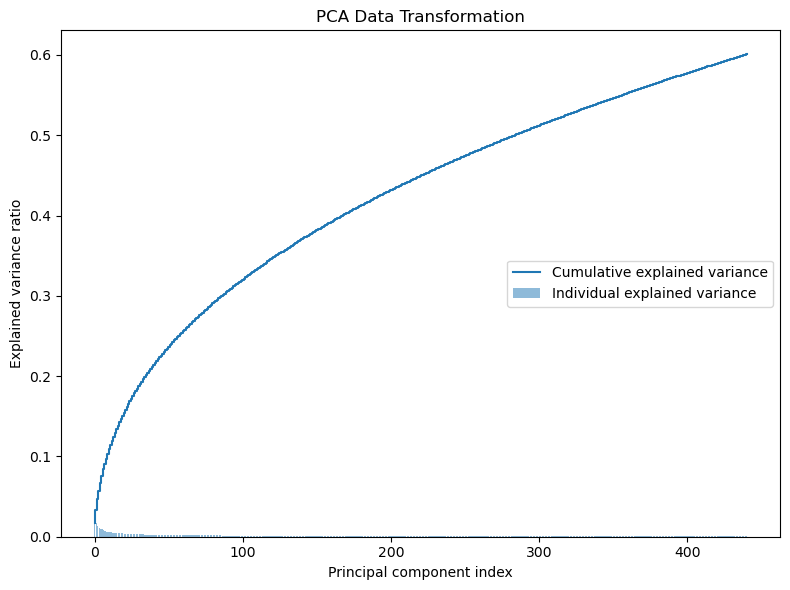

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image100.png
CPU times: total: 1.59 s
Wall time: 1.63 s


In [13]:
%%time
plt.figure(figsize=(8,6))
plt.bar(range(0,len(exp_var_pca01)), exp_var_pca01, alpha= 0.5, align= 'center',
        label= 'Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues01)), cum_sum_eigenvalues01, where= 'mid',
         label= 'Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('PCA Data Transformation')
plt.legend(loc= 'center right')
plt.tight_layout()
save_plot_function(100)

In [14]:
np.sum(exp_var_pca01)

0.6005616670277774

In [15]:
# confirm shape of PCA training test shapes 

# TF-IDF data
print(f'Shape of TF-IDF PCA training set: {X_tfidf_train_pca.shape}')
print(f'Shape of TF-IDF PCA test set:     {X_tfidf_test_pca.shape}')

# Word2vec data
print(f'Shape of Word2Vec PCA test set:   {X_word2vec_train_pca.shape}')
print(f'Shape of Word2Vec PCA test set:   {X_word2vec_test_pca.shape}')

# CountVec data
print(f'Shape of CountVec PCA train set:  {X_cv_train_pca.shape}')
print(f'Shape of CountVec PCA test set:   {X_cv_test_pca.shape}')

Shape of TF-IDF PCA training set: (14184, 523)
Shape of TF-IDF PCA test set:     (3547, 523)
Shape of Word2Vec PCA test set:   (14184, 139)
Shape of Word2Vec PCA test set:   (3547, 139)
Shape of CountVec PCA train set:  (14184, 441)
Shape of CountVec PCA test set:   (3547, 441)


## Random Forest Models

### Random Forest parameter grid 

In [18]:
%%time
# param grid
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6],
}

# create random forest model
rf_model = RandomForestClassifier(random_state=42)

# randomized search for tfidf
rf_search_tfidf = RandomizedSearchCV(
    rf_model,
    rf_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True,
)

# randomized search for word2vec
rf_search_word2vec = RandomizedSearchCV(
    rf_model,
    rf_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True,
)

# randomized search for CountVec
rf_search_cv = RandomizedSearchCV(
    rf_model,
    rf_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True,
)

CPU times: total: 0 ns
Wall time: 0 ns


### Random Forest TF-IDF Tuned (01)

In [262]:
start_01 = time.time()
# fit the model
# rf_search_tfidf.fit(X_tfidf_train_pca, y_train)

# predictors
y_pred_rf_tfidf = rf_search_tfidf.predict(X_tfidf_test_pca)
y_proba_rf_tfidf = rf_search_tfidf.predict_proba(X_tfidf_test_pca)[:,1]

# calculate runtime on test data set
end_01 = time.time()
eval_runtime_seconds_01 = round(end_01 - start_01, 3)

# evaluate
print('Random Forest with TF-IDF + PCA')
print(f'Best Parameters:         {rf_search_tfidf.best_params_}')
print(f'Accuracy:                {rf_search_tfidf.score(X_tfidf_test_pca, y_test)}')
print(f'ROC AUC:                 {roc_auc_score(y_test, y_proba_rf_tfidf)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf_tfidf)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_rf_tfidf)}') 

end_01 = time.time()
eval_runtime_seconds_01 = round(end_01 - start_01, 3)
print(f'Evaluation runtime: {eval_runtime_seconds_01} seconds')

# total_seconds_01 = end_01 - start_01
# hours_01 = int(total_seconds_01 // 3600)
# minutes_01 = int((total_seconds_01 % 3600) // 60)
# seconds_01 = int(total_seconds_01 % 60)
# print(f"\nTotal runtime: {hours_01} hr {minutes_01} min {seconds_01} sec")
# print(total_seconds_01)

Random Forest with TF-IDF + PCA
Best Parameters:         {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Accuracy:                0.9675782351282775
ROC AUC:                 0.9305185185185185
Confusion Matrix:
[[3375    0]
 [ 115   57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3375
           1       1.00      0.33      0.50       172

    accuracy                           0.97      3547
   macro avg       0.98      0.67      0.74      3547
weighted avg       0.97      0.97      0.96      3547

Evaluation runtime: 0.159 seconds


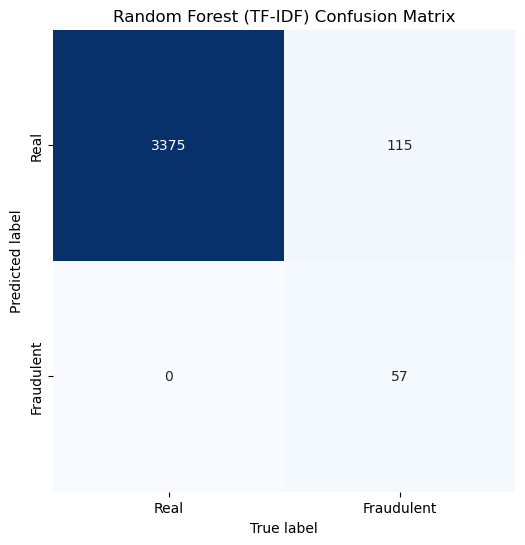

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image101.png


In [21]:
# plot confusion matrix 
cm_01 = confusion_matrix(y_test, y_pred_rf_tfidf)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_01.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Blues', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Random Forest (TF-IDF) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(101)

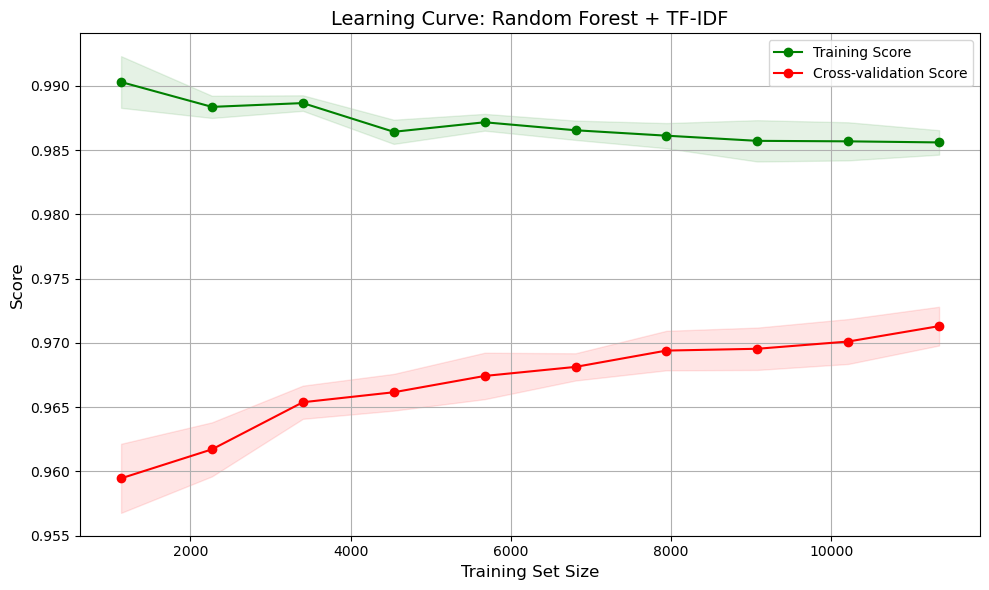

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image102.png
CPU times: total: 1.45 s
Wall time: 2min 47s


In [22]:
%%time
learning_curve_function(rf_search_tfidf.best_estimator_, X_tfidf_train_pca, y_train, 102, name='Random Forest + TF-IDF')

### Random Forest Word2Vec Tuned (02)

In [264]:
start_02 = time.time()
# fit the model
# rf_search_word2vec.fit(X_word2vec_train_pca, y_train)

# predictors
y_pred_rf_word2vec = rf_search_word2vec.predict(X_word2vec_test_pca)
y_proba_rf_word2vec = rf_search_word2vec.predict_proba(X_word2vec_test_pca)[:,1]

# calculate runtime on test data set
end_02 = time.time()
eval_runtime_seconds_02 = round(end_02 - start_02, 3)

# evaluate
print('Random Forest with Word2Vec + PCA')
print(f'Best Parameters:         {rf_search_word2vec.best_params_}')
print(f'Accuracy:                {rf_search_word2vec.score(X_word2vec_test_pca, y_test)}')
print(f'ROC AUC:                 {roc_auc_score(y_test, y_proba_rf_word2vec)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_rf_word2vec)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_rf_word2vec)}') 
print(f'Evaluation runtime: {eval_runtime_seconds_02} seconds')

# end_02 = time.time()
# total_seconds_02 = end_02 - start_02
# hours_02 = int(total_seconds_02 // 3600)
# minutes_02 = int((total_seconds_02 % 3600) // 60)
# seconds_02 = int(total_seconds_02 % 60)
# print(f"\nTotal runtime: {hours_02} hr {minutes_02} min {seconds_02} sec")
# print(total_seconds_02)

Random Forest with Word2Vec + PCA
Best Parameters:         {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Accuracy:                0.9749083732731886
ROC AUC:                 0.9562342807924202
Confusion Matrix:
 [[3373    2]
 [  87   85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3375
           1       0.98      0.49      0.66       172

    accuracy                           0.97      3547
   macro avg       0.98      0.75      0.82      3547
weighted avg       0.97      0.97      0.97      3547

Evaluation runtime: 0.047 seconds


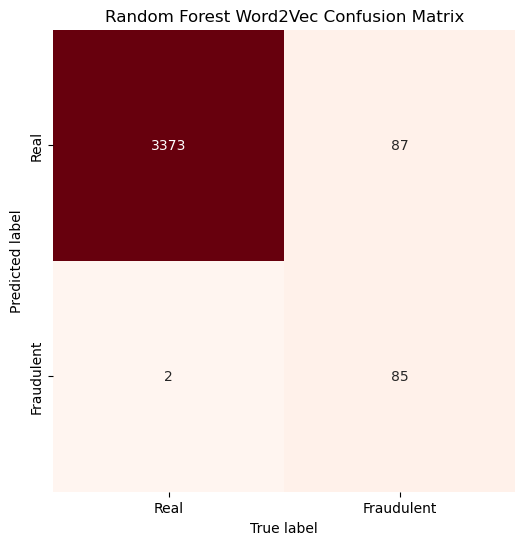

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image103.png


In [25]:
# plot confusion matrix 
cm_02 = confusion_matrix(y_test, y_pred_rf_word2vec)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_02.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Reds', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Random Forest Word2Vec Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(103)

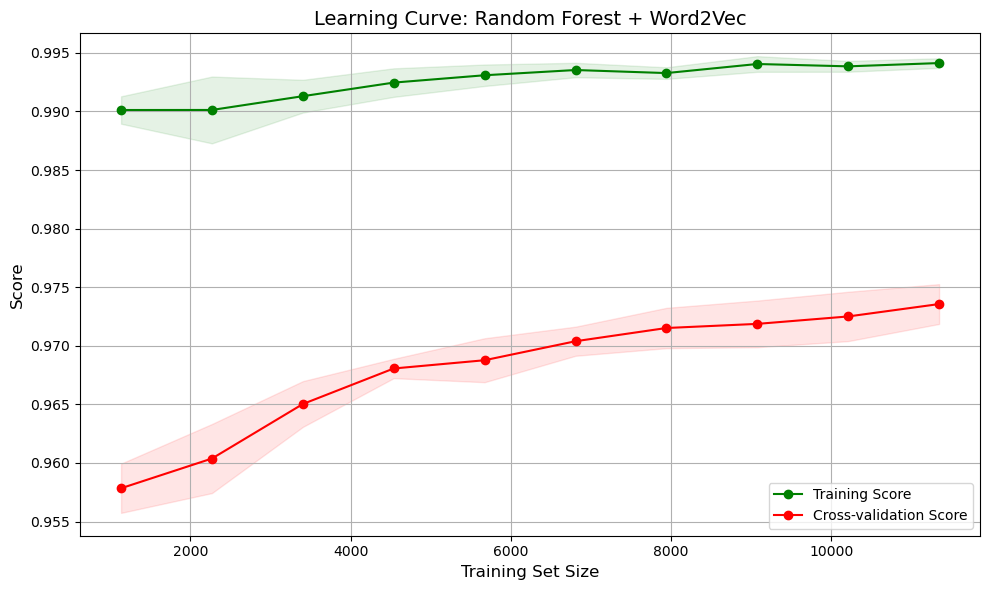

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image104.png
CPU times: total: 938 ms
Wall time: 54.4 s


In [26]:
%%time
learning_curve_function(rf_search_word2vec.best_estimator_, X_word2vec_train_pca, y_train, 104, name='Random Forest + Word2Vec')

### Random Forest CountVec Tuned (03)

In [266]:
start_03 = time.time()
# fit the model
# rf_search_cv.fit(X_cv_train_pca, y_train)

# predictors
y_pred_rf_cv = rf_search_cv.predict(X_cv_test_pca)
y_proba_rf_cv = rf_search_cv.predict_proba(X_cv_test_pca)[:,1]

# calculate runtime on test data set
end_03 = time.time()
eval_runtime_seconds_03 = round(end_03 - start_03, 3)

# evaluate
print('Random Forest with CountVec + PCA')
print(f'Best Parameters: {rf_search_cv.best_params_}')
print(f'Accuracy:                {rf_search_cv.score(X_cv_test_pca, y_test)}')
print(f'ROC AUC:                 {roc_auc_score(y_test, y_proba_rf_cv)}')
print(f'Confusion Matrix:\n      {confusion_matrix(y_test, y_pred_rf_cv)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_rf_cv)}') 
print(f'Evaluation runtime: {eval_runtime_seconds_03} seconds')

# end_03 = time.time()
# total_seconds_03 = end_03 - start_03
# hours_03 = int(total_seconds_03 // 3600)
# minutes_03 = int((total_seconds_03 % 3600) // 60)
# seconds_03 = int(total_seconds_03 % 60)
# print(f"\nTotal runtime: {hours_03} hr {minutes_03} min {seconds_03} sec")

Random Forest with CountVec + PCA
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Accuracy:                0.9720890893712997
ROC AUC:                 0.9458087855297157
Confusion Matrix:
      [[3375    0]
 [  99   73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3375
           1       1.00      0.42      0.60       172

    accuracy                           0.97      3547
   macro avg       0.99      0.71      0.79      3547
weighted avg       0.97      0.97      0.97      3547

Evaluation runtime: 0.091 seconds


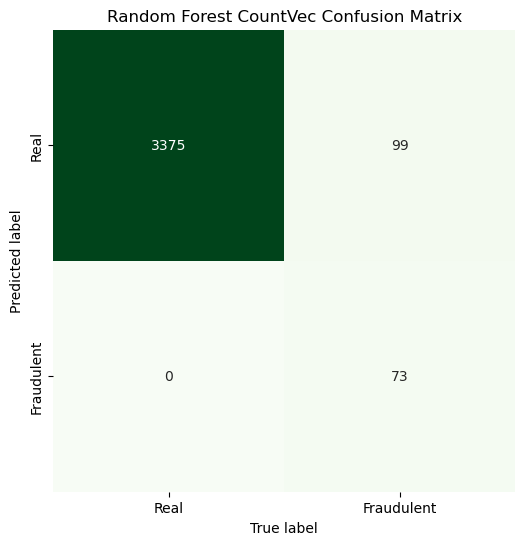

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image105.png


In [29]:
# plot confusion matrix 
cm_03 = confusion_matrix(y_test, y_pred_rf_cv)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_03.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Greens', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('Random Forest CountVec Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(105)

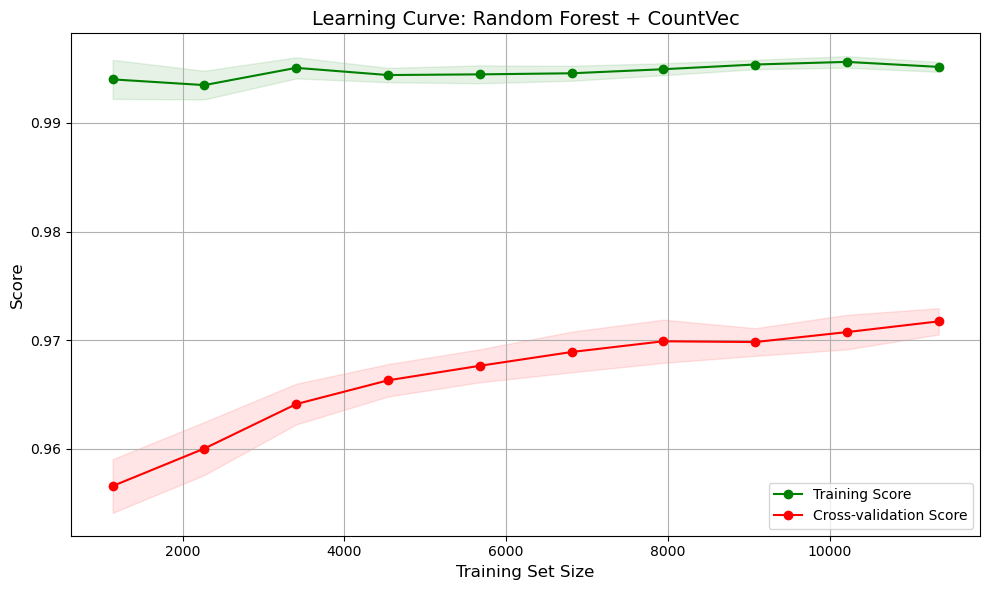

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image106.png
CPU times: total: 1.45 s
Wall time: 1min 47s


In [30]:
%%time 
# plot learning curve 
learning_curve_function(rf_search_cv.best_estimator_, X_cv_train_pca, y_train, 106, name='Random Forest + CountVec')

## SVC Models

### SVC Parameter grid

In [33]:
# Define the parameter grid
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

# create random forest model
svc_model = SVC(probability=True, random_state=42)

# randomized search for tfidf
svc_search_tfidf = RandomizedSearchCV(
    svc_model,
    svc_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

# randomized search for word2vec
svc_search_word2vec = RandomizedSearchCV(
    svc_model,
    svc_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

# randomized search for CountVec
svc_search_cv = RandomizedSearchCV(
    svc_model,
    svc_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

### SVC TF-IDF Tuned (04)

In [268]:
start_04 = time.time()
# fit the model
# svc_search_tfidf.fit(X_tfidf_train_pca, y_train)

# predictors
y_pred_svc_tfidf = svc_search_tfidf.predict(X_tfidf_test_pca)
y_proba_svc_tfidf = svc_search_tfidf.predict_proba(X_tfidf_test_pca)[:,1]

# calculate runtime on test data set
end_04 = time.time()
eval_runtime_seconds_04 = round(end_04 - start_04, 3)

# evaluate
print('SVC with TF-IDF + PCA')
print(f'Best Parameters:         {svc_search_tfidf.best_params_}')
print(f'Accuracy:                {svc_search_tfidf.score(X_tfidf_test_pca, y_test)}')
print(f'ROC AUC:                 {roc_auc_score(y_test, y_proba_svc_tfidf)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc_tfidf)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_svc_tfidf)}') 
print(f'Evaluation runtime: {eval_runtime_seconds_04} seconds')

# end_04 = time.time()
# total_seconds_04 = end_04 - start_04
# hours_04 = int(total_seconds_04 // 3600)
# minutes_04 = int((total_seconds_04 % 3600) // 60)
# seconds_04 = int(total_seconds_04 % 60)
# print(f"\nTotal runtime: {hours_04} hr {minutes_04} min {seconds_04} sec")

SVC with TF-IDF + PCA
Best Parameters:         {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Accuracy:                0.9839300817592331
ROC AUC:                 0.9702222222222221
Confusion Matrix:
[[3363   12]
 [  45  127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3375
           1       0.91      0.74      0.82       172

    accuracy                           0.98      3547
   macro avg       0.95      0.87      0.90      3547
weighted avg       0.98      0.98      0.98      3547

Evaluation runtime: 4.118 seconds


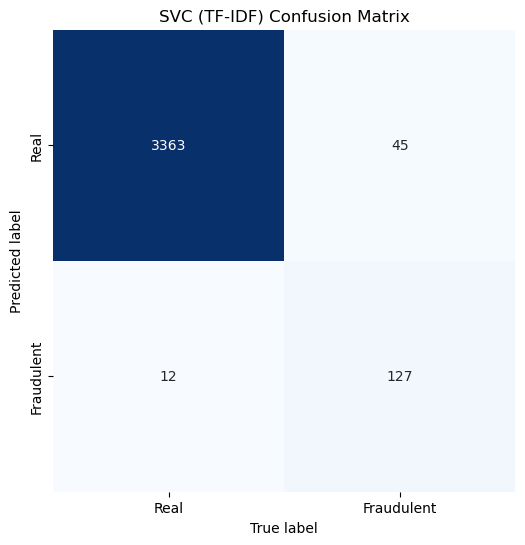

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image107.png


In [36]:
# plot confusion matrix 
cm_04 = confusion_matrix(y_test, y_pred_svc_tfidf)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_04.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Blues', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('SVC (TF-IDF) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(107)

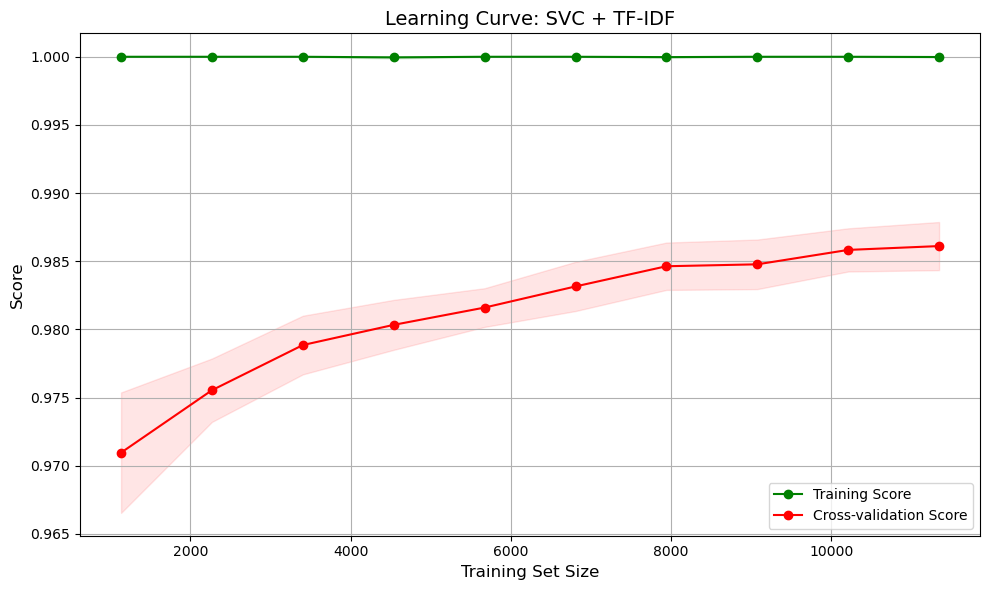

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image108.png
CPU times: total: 19.8 s
Wall time: 41min 4s


In [37]:
%%time
learning_curve_function(svc_search_tfidf.best_estimator_, X_tfidf_train, y_train, 108, name='SVC + TF-IDF')

### SVC Word2vec Tuned (05)

In [214]:
start_05 = time.time()
# fit the model
# svc_search_word2vec.fit(X_word2vec_train_pca, y_train)

# predictors
y_pred_svc_word2vec = svc_search_word2vec.predict(X_word2vec_test_pca)
y_proba_svc_word2vec = svc_search_word2vec.predict_proba(X_word2vec_test_pca)[:,1]

# calculate runtime on test data set
end_05 = time.time()
eval_runtime_seconds_05 = round(end_05 - start_05, 3)

# evaluate
print('SVC with Word2Vec + PCA')
print(f'Best Parameters:         {svc_search_word2vec.best_params_}')
print(f'Accuracy:                {svc_search_word2vec.score(X_word2vec_test_pca, y_test)}')
print(f'ROC AUC:                 {roc_auc_score(y_test, y_proba_svc_word2vec)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_svc_word2vec)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_svc_word2vec)}') 
print(f'Evaluation runtime: {eval_runtime_seconds_05} seconds')

# end_05 = time.time()
# total_seconds_05 = end_05 - start_05
# hours_05 = int(total_seconds_05 // 3600)
# minutes_05 = int((total_seconds_05 % 3600) // 60)
# seconds_05 = int(total_seconds_05 % 60)
# print(f"\nTotal runtime: {hours_05} hr {minutes_05} min {seconds_05} sec")

SVC with Word2Vec + PCA
Best Parameters:         {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Accuracy:                0.9819565830279109
ROC AUC:                 0.9583962101636521
Confusion Matrix:
 [[3360   15]
 [  49  123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3375
           1       0.89      0.72      0.79       172

    accuracy                           0.98      3547
   macro avg       0.94      0.86      0.89      3547
weighted avg       0.98      0.98      0.98      3547

Evaluation runtime: 1.455 seconds


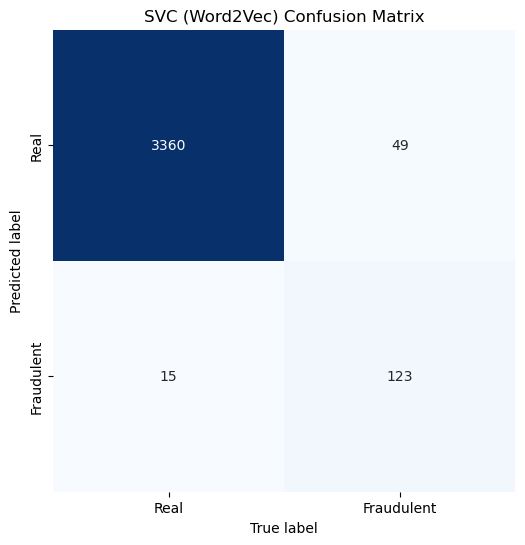

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image109.png


In [40]:
# plot confusion matrix 
cm_05 = confusion_matrix(y_test, y_pred_svc_word2vec)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_05.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Blues', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('SVC (Word2Vec) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(109)

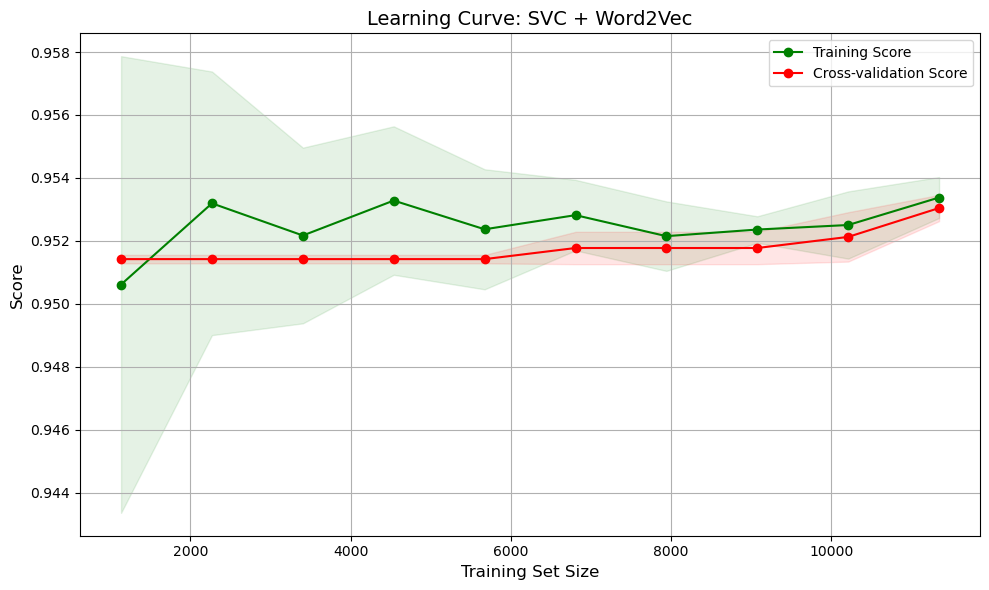

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image110.png
CPU times: total: 3.2 s
Wall time: 4min 44s


In [41]:
%%time
learning_curve_function(svc_search_word2vec.best_estimator_, X_word2vec_train, y_train, 110, name='SVC + Word2Vec')

### SVC CountVec Tuned (06)

In [270]:
start_06 = time.time()
# fit the model
# svc_search_cv.fit(X_cv_train_pca, y_train)

# predictors
y_pred_svc_cv = svc_search_cv.predict(X_cv_test_pca)
y_proba_svc_cv = svc_search_cv.predict_proba(X_cv_test_pca)[:,1]

# calculate runtime on test data set
end_06 = time.time()
eval_runtime_seconds_06 = round(end_06 - start_06, 3)

# evaluate
print('SVC with CountVec + PCA')
print(f'Best Parameters:         {svc_search_cv.best_params_}')
print(f'Accuracy:                {svc_search_cv.score(X_cv_test_pca, y_test)}')
print(f'ROC AUC:                 {roc_auc_score(y_test, y_proba_svc_cv)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_svc_cv)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_svc_cv)}') 
print(f'Evaluation runtime: {eval_runtime_seconds_06} seconds')

# end_06 = time.time()
# total_seconds_06 = end_06 - start_06
# hours_06 = int(total_seconds_06 // 3600)
# minutes_06 = int((total_seconds_06 % 3600) // 60)
# seconds_06 = int(total_seconds_06 % 60)
# print(f"\nTotal runtime: {hours_06} hr {minutes_06} min {seconds_06} sec")

SVC with CountVec + PCA
Best Parameters:         {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Accuracy:                0.9822385114180998
ROC AUC:                 0.961851851851852
Confusion Matrix:
 [[3358   17]
 [  46  126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3375
           1       0.88      0.73      0.80       172

    accuracy                           0.98      3547
   macro avg       0.93      0.86      0.90      3547
weighted avg       0.98      0.98      0.98      3547

Evaluation runtime: 2.293 seconds


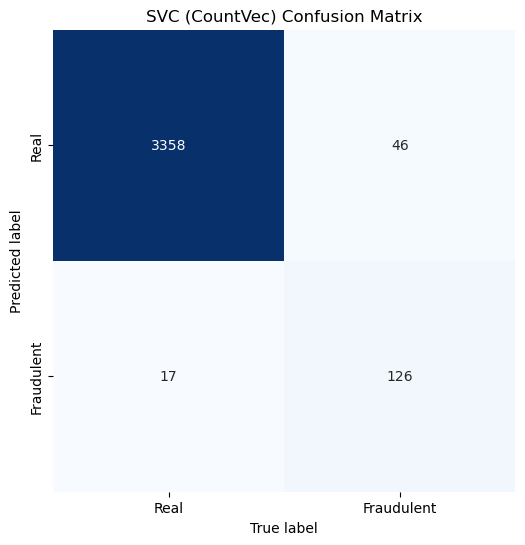

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image111.png


In [44]:
# plot confusion matrix 
cm_06 = confusion_matrix(y_test, y_pred_svc_cv)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_06.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Blues', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('SVC (CountVec) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(111)

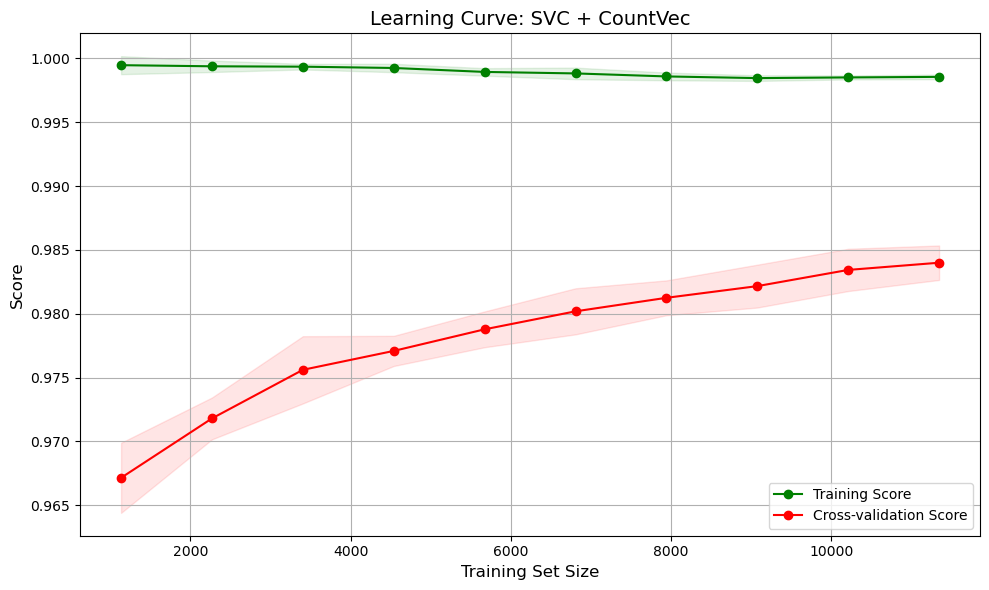

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image112.png
CPU times: total: 25.4 s
Wall time: 48min 10s


In [45]:
%%time
learning_curve_function(svc_search_cv.best_estimator_, X_cv_train, y_train, 112, name='SVC + CountVec')

## Naive Bayes Models

### Naive Bayes parameter grid 

In [48]:
# Define the parameter grid for MultinomialNB models (TF-IDF, CountVec)
mnb_params = {
    'alpha': np.linspace(0.1, 2.0, 20),
    'fit_prior': [True, False]
}

# # create naive bayes model
mnb_model = MultinomialNB()

# # randomized search for tfidf
mnb_search_tfidf = RandomizedSearchCV(
    mnb_model,
    mnb_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True,
)

# randomized search for word2vec
mnb_search_word2vec = RandomizedSearchCV(
    mnb_model,
    mnb_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True,
)

# # randomized search for CountVec
mnb_search_cv = RandomizedSearchCV(
    mnb_model,
    mnb_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True,
)

# Define parameter grid for GaussianNB model (Word2Vec)
gnb_params = {
    'var_smoothing': np.logspace(-12, -7, 20)
}

# create GaussianNB model
gnb_model = GaussianNB()

# Randomized search for Word2vec
gnb_search_word2vec = RandomizedSearchCV(
    gnb_model,
    gnb_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True,
)

### Naive Bayes, Multinomial TF-IDF Tuned (07)

In [272]:
start_07 = time.time()
# fit the model
# mnb_search_tfidf.fit(X_tfidf_train, y_train)

# predictors
y_pred_mnb_tfidf = mnb_search_tfidf.predict(X_tfidf_test)
y_proba_mnb_tfidf = mnb_search_tfidf.predict_proba(X_tfidf_test)[:,1]

# calculate runtime on test data set
end_07 = time.time()
eval_runtime_seconds_07 = round(end_07 - start_07, 3)

# evaluate
print('MultinomialNB with TF-IDF')
print(f'Best Parameters:         {mnb_search_tfidf.best_params_}')
print(f'Accuracy:                {mnb_search_tfidf.score(X_tfidf_test, y_test)}')
print(f'ROC AUC:                 {roc_auc_score(y_test, y_proba_mnb_tfidf)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_mnb_tfidf)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_mnb_tfidf)}') 
print(f'Evaluation runtime: {eval_runtime_seconds_07} seconds')

# end_07 = time.time()
# total_seconds_07 = end_07 - start_07
# hours_07 = int(total_seconds_07 // 3600)
# minutes_07 = int((total_seconds_07 % 3600) // 60)
# seconds_07 = int(total_seconds_07 % 60)
# print(f"\nTotal runtime: {hours_07} hr {minutes_07} min {seconds_07} sec")

MultinomialNB with TF-IDF
Best Parameters:         {'fit_prior': True, 'alpha': 1.4}
Accuracy:                0.965886664787144
ROC AUC:                 0.9258742463393627
Confusion Matrix:
[[3331   44]
 [  77   95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3375
           1       0.68      0.55      0.61       172

    accuracy                           0.97      3547
   macro avg       0.83      0.77      0.80      3547
weighted avg       0.96      0.97      0.96      3547

Evaluation runtime: 0.242 seconds


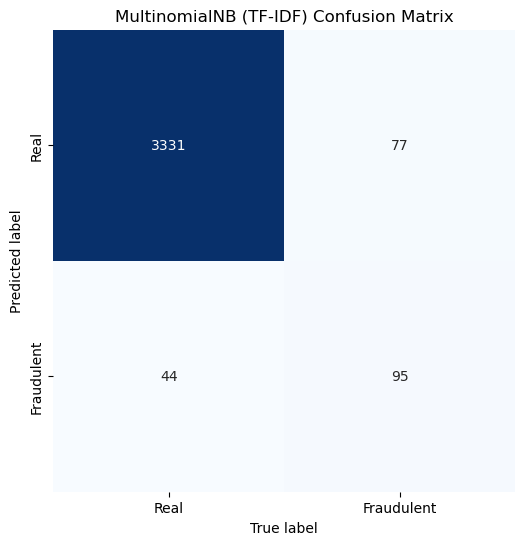

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image113.png


In [51]:
# plot confusion matrix 
cm_07 = confusion_matrix(y_test, y_pred_mnb_tfidf)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_07.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Blues', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('MultinomialNB (TF-IDF) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(113)

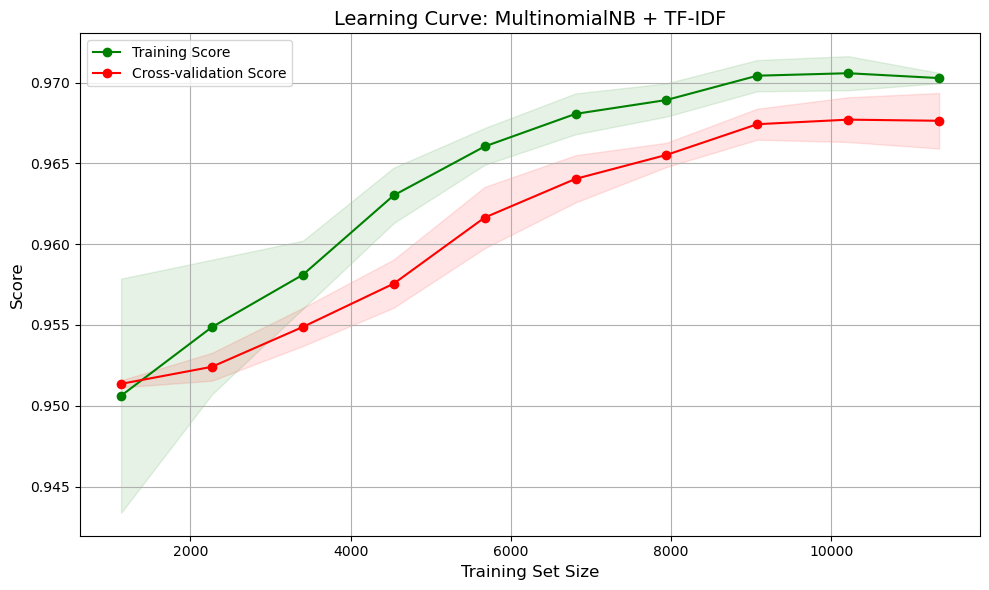

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image114.png
CPU times: total: 766 ms
Wall time: 10.6 s


In [52]:
%%time
learning_curve_function(mnb_search_tfidf.best_estimator_, X_tfidf_train, y_train, 114, name='MultinomialNB + TF-IDF')

### Naive Bayes, Gaussian Word2Vec Tuned (08)

In [274]:
start_08 = time.time()
# fit the model
# gnb_search_word2vec.fit(X_word2vec_train, y_train)

# predictors
y_pred_gnb_word2vec = gnb_search_word2vec.predict(X_word2vec_test)
y_proba_gnb_word2vec = gnb_search_word2vec.predict_proba(X_word2vec_test)[:,1]

# calculate runtime on test data set
end_08 = time.time()
eval_runtime_seconds_08 = round(end_08 - start_08, 3)

# evaluate
print('MultinomialNB with Word2Vec')
print(f'Best Parameters:         {gnb_search_word2vec.best_params_}')
print(f'Accuracy:                {gnb_search_word2vec.score(X_word2vec_test, y_test)}')
print(f'ROC AUC:                 {roc_auc_score(y_test, y_proba_gnb_word2vec)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_gnb_word2vec)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_gnb_word2vec)}') 
print(f'Evaluation runtime: {eval_runtime_seconds_08} seconds')

# end_08 = time.time()
# total_seconds_08 = end_08 - start_08
# hours_08 = int(total_seconds_08 // 3600)
# minutes_08 = int((total_seconds_08 % 3600) // 60)
# seconds_08 = int(total_seconds_08 % 60)
# print(f"\nTotal runtime: {hours_08} hr {minutes_08} min {seconds_08} sec")

MultinomialNB with Word2Vec
Best Parameters:         {'var_smoothing': 1e-12}
Accuracy:                0.4166901606991824
ROC AUC:                 0.6714108527131782
Confusion Matrix:
[[1314 2061]
 [   8  164]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.39      0.56      3375
           1       0.07      0.95      0.14       172

    accuracy                           0.42      3547
   macro avg       0.53      0.67      0.35      3547
weighted avg       0.95      0.42      0.54      3547

Evaluation runtime: 0.072 seconds


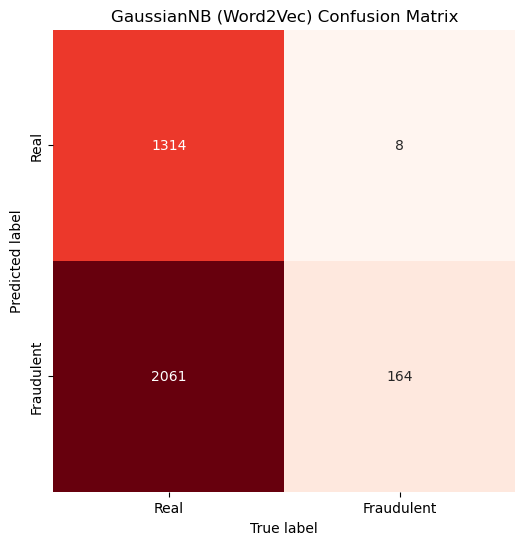

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image115.png


In [55]:
# plot confusion matrix 
cm_08 = confusion_matrix(y_test, y_pred_gnb_word2vec)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_08.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Reds', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('GaussianNB (Word2Vec) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(115)

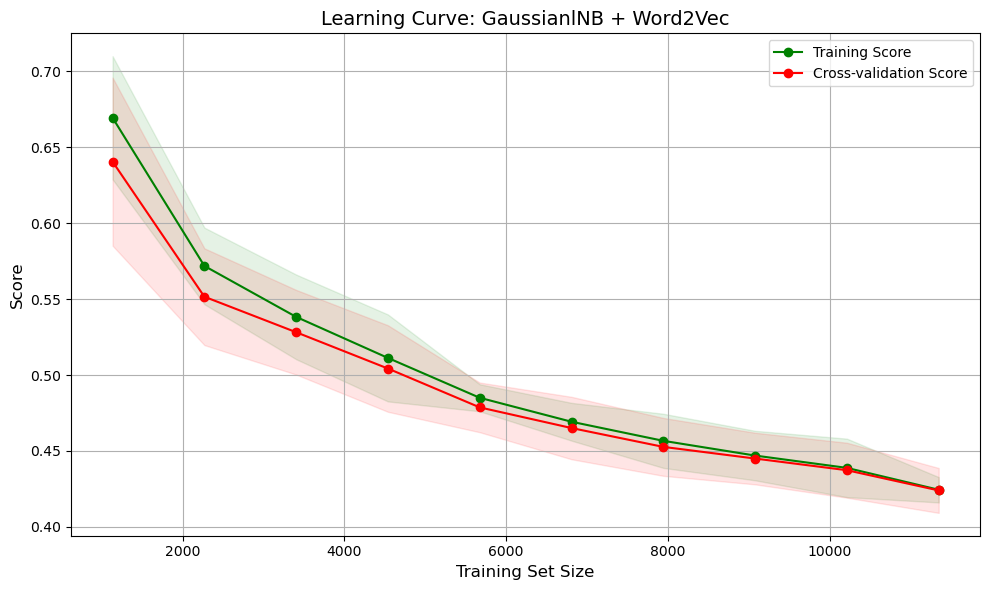

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image116.png
CPU times: total: 781 ms
Wall time: 4.31 s


In [56]:
%%time
learning_curve_function(gnb_search_word2vec.best_estimator_, X_word2vec_train, y_train, 116, name='GaussianlNB + Word2Vec')

### Naive Bayes, Multinomial CountVec Tuned (09)

In [276]:
start_09 = time.time()
# fit the model
# mnb_search_cv.fit(X_cv_train, y_train)

# predictors
y_pred_mnb_cv = mnb_search_cv.predict(X_cv_test)
y_proba_mnb_cv = mnb_search_cv.predict_proba(X_cv_test)[:,1]

# calculate runtime on test data set
end_09 = time.time()
eval_runtime_seconds_09 =round(end_09 - start_09, 3)

# evaluate
print('MultinomialNB with CountVec')
print(f'Best Parameters:         {mnb_search_cv.best_params_}')
print(f'Accuracy:                {mnb_search_cv.score(X_cv_test, y_test)}')
print(f'ROC AUC:                 {roc_auc_score(y_test, y_proba_mnb_cv)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_mnb_cv)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_mnb_cv)}')
print(f'Evaluation runtime: {eval_runtime_seconds_09} seconds')

# end_09 = time.time()
# total_seconds_09 = end_09 - start_09
# hours_09 = int(total_seconds_09 // 3600)
# minutes_09 = int((total_seconds_09 % 3600) // 60)
# seconds_09 = int(total_seconds_09 % 60)
# print(f"\nTotal runtime: {hours_09} hr {minutes_09} min {seconds_09} sec")

MultinomialNB with CountVec
Best Parameters:         {'fit_prior': True, 'alpha': 0.3}
Accuracy:                0.9092190583591768
ROC AUC:                 0.9416718346253229
Confusion Matrix:
 [[3085  290]
 [  32  140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      3375
           1       0.33      0.81      0.47       172

    accuracy                           0.91      3547
   macro avg       0.66      0.86      0.71      3547
weighted avg       0.96      0.91      0.93      3547

Evaluation runtime: 0.259 seconds


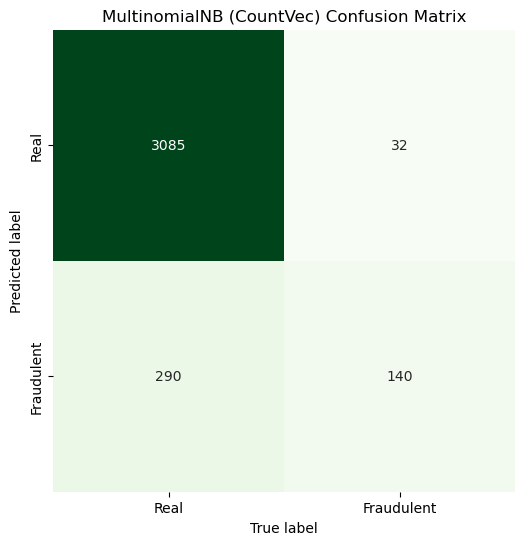

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image117.png


In [59]:
# plot confusion matrix 
cm_09 = confusion_matrix(y_test, y_pred_mnb_cv)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_09.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Greens', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('MultinomialNB (CountVec) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(117)

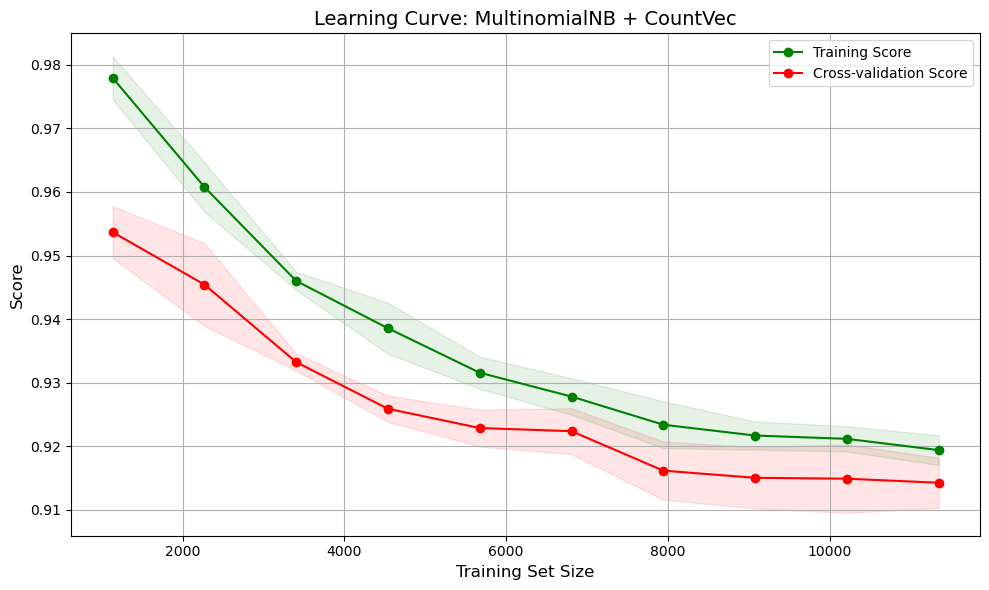

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image118.png
CPU times: total: 750 ms
Wall time: 10.6 s


In [60]:
%%time
learning_curve_function(mnb_search_cv.best_estimator_, X_cv_train, y_train, 118, name='MultinomialNB + CountVec')

## Logistic Regression Models

### Logistic Regression parameter grid

In [63]:
# Define the hyperparameter grid
lg_params = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
    # 'max_iter'  : [100, 500, 1000,2000] warning: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
    'max_iter' : [3000, 5000],
}

# create random forest model
lg_model = LogisticRegression(random_state=42)

# randomized search for tfidf
lg_search_tfidf = RandomizedSearchCV(
    lg_model,
    lg_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

# randomized search for word2vec
lg_search_word2vec = RandomizedSearchCV(
    lg_model,
    lg_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

# randomized search for CountVec
lg_search_cv = RandomizedSearchCV(
    lg_model,
    lg_params,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

### Logistic Regression TF-IDF Tuned (10)

In [278]:
start_10 = time.time()
# fit the model
# lg_search_tfidf.fit(X_tfidf_train_pca, y_train)

# predictors
y_pred_lg_tfidf = lg_search_tfidf.predict(X_tfidf_test_pca)
y_proba_lg_tfidf = lg_search_tfidf.predict_proba(X_tfidf_test_pca)[:,1]

# calculate runtime on test data set
end_10 = time.time()
eval_runtime_seconds_10 =round(end_10 - start_10, 3)

# evaluate
print('LogReg with TF-IDF + PCA')
print(f'Best Parameters:         {lg_search_tfidf.best_params_}')
print(f'Accuracy:                {lg_search_tfidf.score(X_tfidf_test_pca, y_test)}')
print(f'ROC AUC:                 {roc_auc_score(y_test, y_proba_lg_tfidf)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lg_tfidf)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_lg_tfidf)}') 
print(f'Evaluation runtime: {eval_runtime_seconds_10} seconds')

# end_10 = time.time()
# total_seconds_10 = end_10 - start_10
# hours_10 = int(total_seconds_10 // 3600)
# minutes_10 = int((total_seconds_10 % 3600) // 60)
# seconds_10 = int(total_seconds_10 % 60)
# print(f"\nTotal runtime: {hours_10} hr {minutes_10} min {seconds_10} sec")

LogReg with TF-IDF + PCA
Best Parameters:         {'solver': 'saga', 'penalty': 'l1', 'max_iter': 3000, 'C': 0.1}
Accuracy:                0.9780095855652664
ROC AUC:                 0.9628199827734711
Confusion Matrix:
[[3359   16]
 [  62  110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3375
           1       0.87      0.64      0.74       172

    accuracy                           0.98      3547
   macro avg       0.93      0.82      0.86      3547
weighted avg       0.98      0.98      0.98      3547

Evaluation runtime: 0.013 seconds


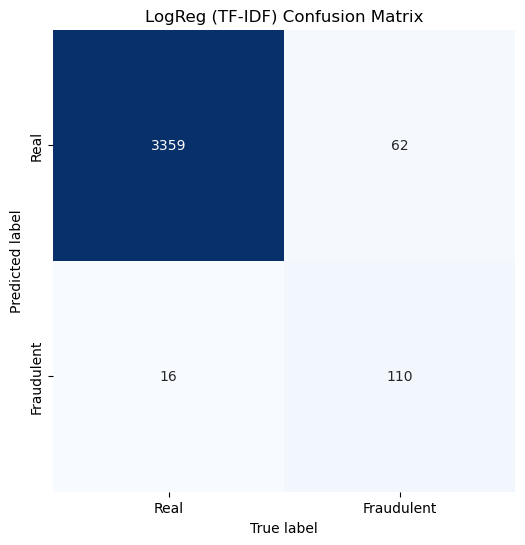

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image119.png


In [66]:
# plot confusion matrix 
cm_10 = confusion_matrix(y_test, y_pred_lg_tfidf)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_10.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Blues', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('LogReg (TF-IDF) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(119)

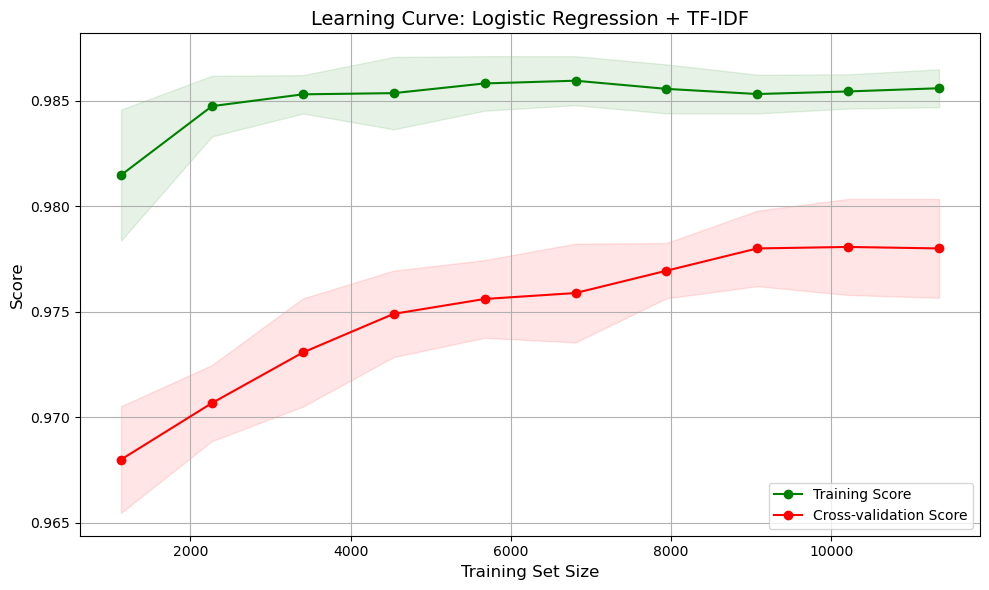

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image120.png
CPU times: total: 2.61 s
Wall time: 8min 39s


In [67]:
%%time
learning_curve_function(lg_search_tfidf.best_estimator_, X_tfidf_train_pca, y_train, 120, name='Logistic Regression + TF-IDF')

### Logistic Regression Word2Vec Tuned (11)

In [280]:
start_11 = time.time()
# fit the model
# lg_search_word2vec.fit(X_word2vec_train_pca, y_train)

# predictors
y_pred_lg_word2vec = lg_search_word2vec.predict(X_word2vec_test_pca)
y_proba_lg_word2vec = lg_search_word2vec.predict_proba(X_word2vec_test_pca)[:,1]

# calculate runtime on test data set
end_11 = time.time()
eval_runtime_seconds_11 =round(end_11 - start_11, 3)

# evaluate
print('LogReg with Word2Vec + PCA')
print(f'Best Parameters:         {lg_search_word2vec.best_params_}')
print(f'Accuracy:                {lg_search_word2vec.score(X_word2vec_test_pca, y_test)}')
print(f'ROC AUC:                 {roc_auc_score(y_test, y_proba_lg_word2vec)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_lg_word2vec)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_lg_word2vec)}')  
print(f'Evaluation runtime: {eval_runtime_seconds_11} seconds')

# end_11 = time.time()
# total_seconds_11 = end_11 - start_11
# hours_11 = int(total_seconds_11 // 3600)
# minutes_11 = int((total_seconds_11 % 3600) // 60)
# seconds_11 = int(total_seconds_11 % 60)
# print(f"\nTotal runtime: {hours_11} hr {minutes_11} min {seconds_11} sec")

LogReg with Word2Vec + PCA
Best Parameters:         {'solver': 'saga', 'penalty': 'l2', 'max_iter': 3000, 'C': 0.021544346900318832}
Accuracy:                0.9625035241048774
ROC AUC:                 0.9098242894056847
Confusion Matrix:
 [[3356   19]
 [ 114   58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3375
           1       0.75      0.34      0.47       172

    accuracy                           0.96      3547
   macro avg       0.86      0.67      0.72      3547
weighted avg       0.96      0.96      0.96      3547

Evaluation runtime: 0.004 seconds


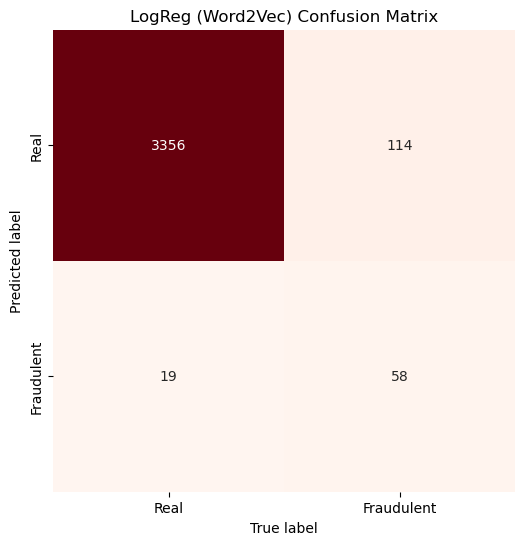

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image121.png


In [70]:
# plot confusion matrix 
cm_11 = confusion_matrix(y_test, y_pred_lg_word2vec)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_11.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Reds', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('LogReg (Word2Vec) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(121)

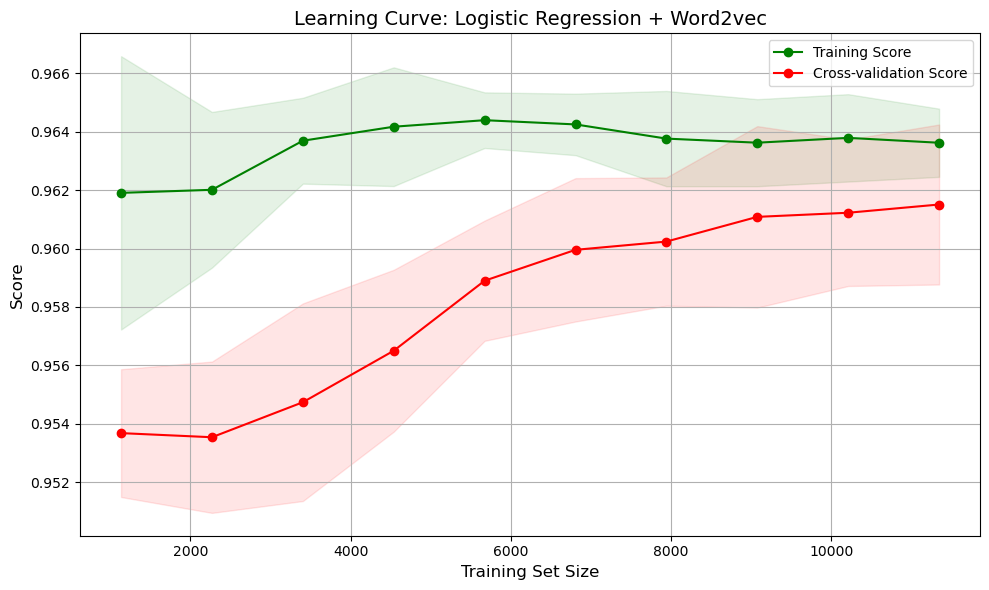

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image122.png
CPU times: total: 656 ms
Wall time: 1min 5s


In [71]:
%%time
learning_curve_function(lg_search_word2vec.best_estimator_, X_word2vec_train_pca, y_train, 122, name='Logistic Regression + Word2vec')

### Logistic Regression CountVec Tuned (12)

In [282]:
start_12 = time.time()
# fit the model
# lg_search_cv.fit(X_cv_train_pca, y_train)

# predictors
y_pred_lg_cv = lg_search_cv.predict(X_cv_test_pca)
y_proba_lg_cv = lg_search_cv.predict_proba(X_cv_test_pca)[:,1]

# calculate runtime on test data set
end_12 = time.time()
eval_runtime_seconds_12 =round(end_12 - start_12, 3)

# evaluate
print('LogReg with CountVec + PCA')
print(f'Best Parameters:         {lg_search_cv.best_params_}')
print(f'Accuracy:                {lg_search_cv.score(X_cv_test_pca, y_test)}')
print(f'ROC AUC:                 {roc_auc_score(y_test, y_proba_lg_cv)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_lg_cv)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_lg_cv)}') 
print(f'Evaluation runtime: {eval_runtime_seconds_12} seconds')

# end_12 = time.time()
# total_seconds_12 = end_12 - start_12
# hours_12 = int(total_seconds_12 // 3600)
# minutes_12 = int((total_seconds_12 % 3600) // 60)
# seconds_12 = int(total_seconds_12 % 60)
# print(f"\nTotal runtime: {hours_12} hr {minutes_12} min {seconds_12} sec")

LogReg with CountVec + PCA
Best Parameters:         {'solver': 'saga', 'penalty': 'l2', 'max_iter': 3000, 'C': 0.021544346900318832}
Accuracy:                0.9760360868339442
ROC AUC:                 0.9651662360034452
Confusion Matrix:
 [[3357   18]
 [  67  105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3375
           1       0.85      0.61      0.71       172

    accuracy                           0.98      3547
   macro avg       0.92      0.80      0.85      3547
weighted avg       0.97      0.98      0.97      3547

Evaluation runtime: 0.009 seconds


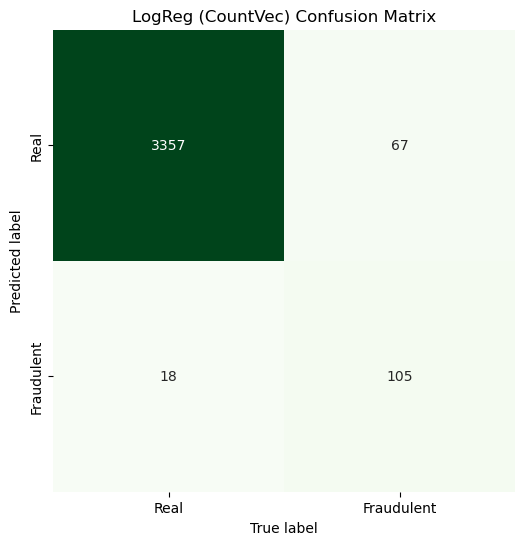

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image123.png


In [74]:
# plot confusion matrix 
cm_12 = confusion_matrix(y_test, y_pred_lg_cv)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cm_12.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Greens', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('LogReg (CountVec) Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(123)

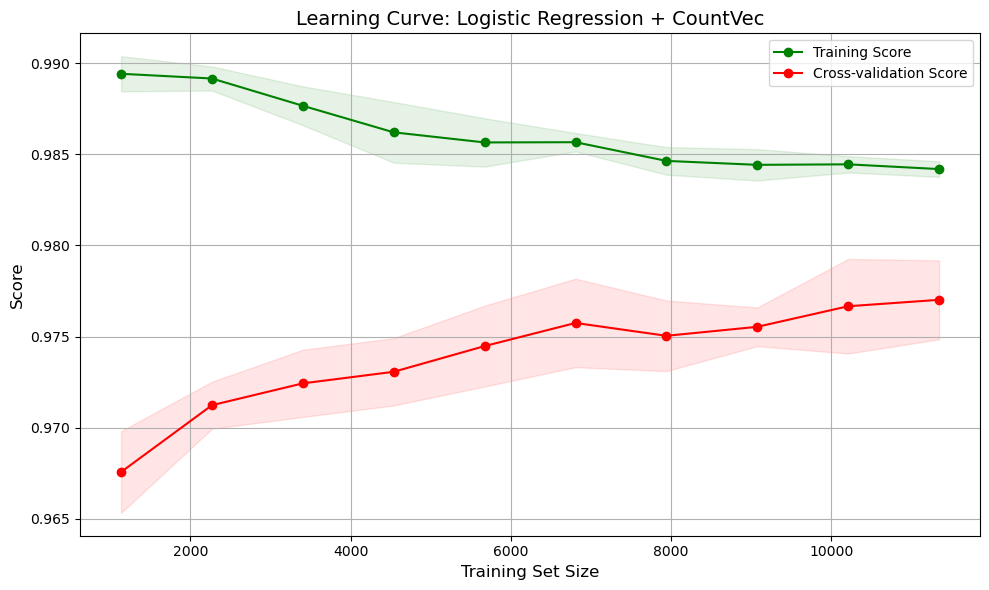

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image124.png
CPU times: total: 3.52 s
Wall time: 14min


In [75]:
%%time
learning_curve_function(lg_search_cv.best_estimator_, X_cv_train_pca, y_train, 124, name='Logistic Regression + CountVec')

## ROC curve for all 12 models

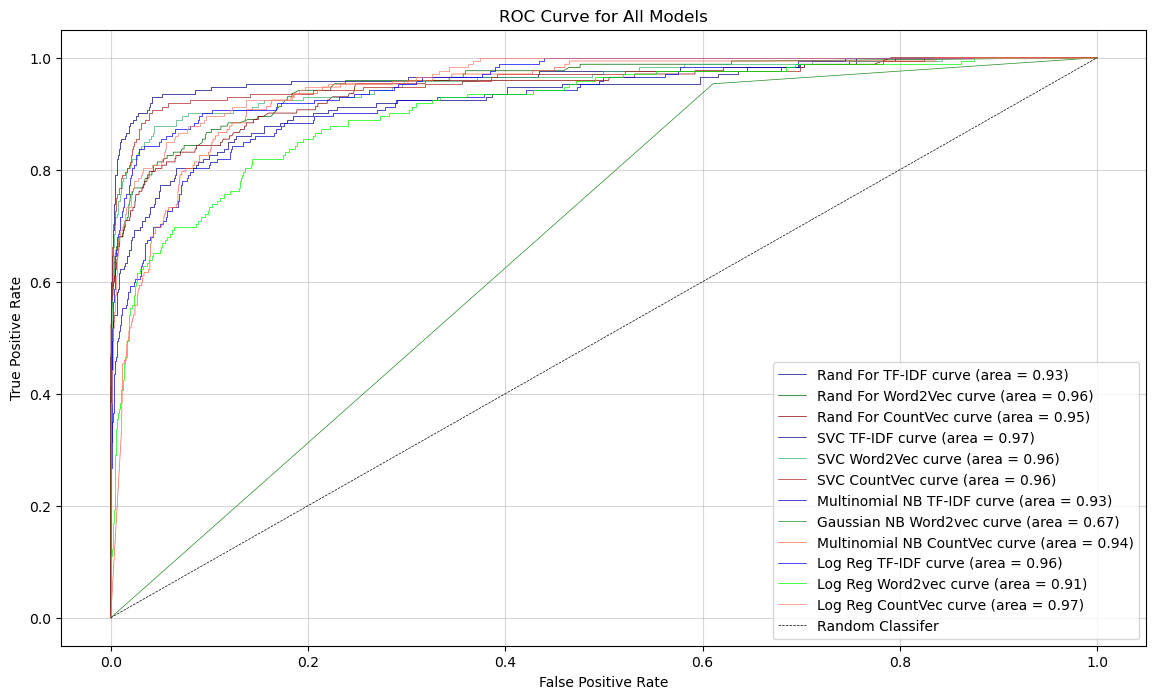

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image125.png
CPU times: total: 4.5 s
Wall time: 4.58 s


In [77]:
%%time
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
y_prob_01 = rf_search_tfidf.predict_proba(X_tfidf_test_pca)[:,1]
y_prob_02 = rf_search_word2vec.predict_proba(X_word2vec_test_pca)[:,1]
y_prob_03 = rf_search_cv.predict_proba(X_cv_test_pca)[:,1]
y_prob_04 = svc_search_tfidf.predict_proba(X_tfidf_test_pca)[:,1]
y_prob_05 = svc_search_word2vec.predict_proba(X_word2vec_test_pca)[:,1]
y_prob_06 = svc_search_cv.predict_proba(X_cv_test_pca)[:,1]
y_prob_07 = mnb_search_tfidf.predict_proba(X_tfidf_test)[:,1]
y_prob_08 = gnb_search_word2vec.predict_proba(X_word2vec_test)[:,1]
y_prob_09 = mnb_search_cv.predict_proba(X_cv_test)[:,1]
y_prob_10 = lg_search_tfidf.predict_proba(X_tfidf_test_pca)[:,1]
y_prob_11 = lg_search_word2vec.predict_proba(X_word2vec_test_pca)[:,1]
y_prob_12 = lg_search_cv.predict_proba(X_cv_test_pca)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr01, tpr01, _ = metrics.roc_curve(y_test, y_prob_01)
fpr02, tpr02, _ = metrics.roc_curve(y_test, y_prob_02)
fpr03, tpr03, _ = metrics.roc_curve(y_test, y_prob_03)
fpr04, tpr04, _ = metrics.roc_curve(y_test, y_prob_04)
fpr05, tpr05, _ = metrics.roc_curve(y_test, y_prob_05)
fpr06, tpr06, _ = metrics.roc_curve(y_test, y_prob_06)
fpr07, tpr07, _ = metrics.roc_curve(y_test, y_prob_07)
fpr08, tpr08, _ = metrics.roc_curve(y_test, y_prob_08)
fpr09, tpr09, _ = metrics.roc_curve(y_test, y_prob_09)
fpr10, tpr10, _ = metrics.roc_curve(y_test, y_prob_10)
fpr11, tpr11, _ = metrics.roc_curve(y_test, y_prob_11)
fpr12, tpr12, _ = metrics.roc_curve(y_test, y_prob_12)


# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc01 = metrics.auc(fpr01, tpr01)
roc_auc02 = metrics.auc(fpr02, tpr02)
roc_auc03 = metrics.auc(fpr03, tpr03)
roc_auc04 = metrics.auc(fpr04, tpr04)
roc_auc05 = metrics.auc(fpr05, tpr05)
roc_auc06 = metrics.auc(fpr06, tpr06)
roc_auc07 = metrics.auc(fpr07, tpr07)
roc_auc08 = metrics.auc(fpr08, tpr08)
roc_auc09 = metrics.auc(fpr09, tpr09)
roc_auc10 = metrics.auc(fpr10, tpr10)
roc_auc11 = metrics.auc(fpr11, tpr11)
roc_auc12 = metrics.auc(fpr12, tpr12)

# Plot the ROC Curve
plt.figure(figsize =(14, 8))
lw = 0.5
plt.plot(fpr01, tpr01, color='darkblue', lw = lw, label = 'Rand For TF-IDF curve (area = %0.2f)' % roc_auc01)
plt.plot(fpr02, tpr02, color='darkgreen', lw = lw, label = 'Rand For Word2Vec curve (area = %0.2f)' % roc_auc02)
plt.plot(fpr03, tpr03, color='darkred', lw = lw, label = 'Rand For CountVec curve (area = %0.2f)' % roc_auc03)
plt.plot(fpr04, tpr04, color='navy', lw = lw, label = 'SVC TF-IDF curve (area = %0.2f)' % roc_auc04)
plt.plot(fpr05, tpr05, color='mediumseagreen', lw = lw, label = 'SVC Word2Vec curve (area = %0.2f)' % roc_auc05)
plt.plot(fpr06, tpr06, color='firebrick', lw = lw, label = 'SVC CountVec curve (area = %0.2f)' % roc_auc06)
plt.plot(fpr07, tpr07, color='mediumblue', lw = lw, label = 'Multinomial NB TF-IDF curve (area = %0.2f)' % roc_auc07)
plt.plot(fpr08, tpr08, color='forestgreen', lw = lw, label = 'Gaussian NB Word2vec curve (area = %0.2f)' % roc_auc08)
plt.plot(fpr09, tpr09, color='tomato', lw = lw, label = 'Multinomial NB CountVec curve (area = %0.2f)' % roc_auc09)
plt.plot(fpr10, tpr10, color='blue', lw = lw, label = 'Log Reg TF-IDF curve (area = %0.2f)' % roc_auc10)
plt.plot(fpr11, tpr11, color='lime', lw = lw, label = 'Log Reg Word2vec curve (area = %0.2f)' % roc_auc11)
plt.plot(fpr12, tpr12, color='salmon', lw = lw, label = 'Log Reg CountVec curve (area = %0.2f)' % roc_auc12)


plt.plot([0, 1], [0, 1], color = 'black', lw = lw, linestyle = '--', label= 'Random Classifer')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc = "lower right")

save_plot_function(125)

## Store results of all models in final_df

In [79]:
# # store run times
# runtimes_seconds = [
#     end_01 - start_01,
#     end_02 - start_02,
#     end_03 - start_03,
#     end_04 - start_04,
#     end_05 - start_05,
#     end_06 - start_06,
#     end_07 - start_07,
#     end_08 - start_08,
#     end_09 - start_09,
#     end_10 - start_10,
#     end_11 - start_11,
#     end_12 - start_12
# ]

# # convert to hours/minutes/seconds format
# runtimes_hms = []
# for total_seconds in runtimes_seconds:
#     h = int(total_seconds // 3600)
#     m = int((total_seconds % 3600) // 60)
#     s = int(total_seconds % 60)
#     runtimes_hms.append(f"{h:02d}:{m:02d}:{s:02d}")

In [80]:
# runtimes_hms

['00:11:00',
 '00:04:16',
 '00:08:33',
 '02:29:52',
 '00:34:04',
 '01:50:29',
 '00:00:15',
 '00:00:05',
 '00:00:14',
 '01:02:19',
 '00:10:41',
 '00:57:11']

In [298]:
eval_runtimes_seconds = [
    eval_runtime_seconds_01, 
    eval_runtime_seconds_02,
    eval_runtime_seconds_03,
    eval_runtime_seconds_04,
    eval_runtime_seconds_05,
    eval_runtime_seconds_06,
    eval_runtime_seconds_07,
    eval_runtime_seconds_08,
    eval_runtime_seconds_09,
    eval_runtime_seconds_10,
    eval_runtime_seconds_11,
    eval_runtime_seconds_12,
]

In [300]:
eval_runtimes_seconds

[0.159,
 0.047,
 0.091,
 4.118,
 1.455,
 2.293,
 0.242,
 0.072,
 0.259,
 0.013,
 0.004,
 0.009]

In [302]:
# store results of all models 
results_list = []

# list of models, vectorizers, and datasets
models_info = [
    ('Random Forest', 'TF-IDF + PCA', rf_search_tfidf, X_tfidf_test_pca, y_test),
    ('Random Forest', 'Word2Vec + PCA', rf_search_word2vec, X_word2vec_test_pca, y_test),
    ('Random Forest', 'CountVec + PCA', rf_search_cv, X_cv_test_pca, y_test),
    ('SVC', 'TF-IDF + PCA', svc_search_tfidf, X_tfidf_test_pca, y_test),
    ('SVC', 'Word2Vec + PCA', svc_search_word2vec, X_word2vec_test_pca, y_test),
    ('SVC', 'CountVec + PCA', svc_search_cv, X_cv_test_pca, y_test),
    ('Naive Bayes Multi', 'TF-IDF', mnb_search_tfidf, X_tfidf_test, y_test),
    ('Naive Bayes Gaus', 'Word2Vec', gnb_search_word2vec, X_word2vec_test, y_test),
    ('Naive Bayes Multi', 'CountVec', mnb_search_cv, X_cv_test, y_test),
    ('Logistic Regression', 'TF-IDF + PCA', lg_search_tfidf, X_tfidf_test_pca, y_test),
    ('Logistic Regression', 'Word2Vec + PCA', lg_search_word2vec, X_word2vec_test_pca, y_test),
    ('Logistic Regression', 'CountVec + PCA', lg_search_cv, X_cv_test_pca, y_test),
]

# loop through models
for i, (model_name, vectorizer_name, model, X_test_data, y_test_data) in enumerate(models_info):
    # predict labels and probabilities
    y_pred = model.predict(X_test_data)
    y_proba = model.predict(X_test_data)

    # model metrics
    report = classification_report(y_test_data, y_pred, output_dict=True)

    # add to results_list
    results_list.append({
        'Model': model_name,
        'Vectorizer': vectorizer_name,
        'F1-Score': report['weighted avg']['f1-score'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        # 'Accuracy': accuracy_score(y_test_data, y_pred),
        # 'ROC AUC': roc_auc_score(y_test_data, y_proba),
        # 'Runtime (ms)': runtimes_hms[i],
    })

# convert to dataframe 
results_df = pd.DataFrame(results_list)

In [303]:
# round float columns to be 2 decimal place
for col in ['F1-Score', 'Precision', 'Recall']:
    results_df[col] = (results_df[col] * 100).round(2)

In [304]:
results_df.head(12)

,Model,Vectorizer,F1-Score,Precision,Recall
0,Random Forest,TF-IDF + PCA,95.97,96.86,96.76
1,Random Forest,Word2Vec + PCA,97.09,97.50,97.49
2,Random Forest,CountVec + PCA,96.67,97.29,97.21
3,SVC,TF-IDF + PCA,98.31,98.32,98.39
4,SVC,Word2Vec + PCA,98.10,98.11,98.20
5,SVC,CountVec + PCA,98.15,98.14,98.22
6,Naive Bayes Multi,TF-IDF,96.42,96.32,96.59
7,Naive Bayes Gaus,Word2Vec,53.90,94.93,41.67
8,Naive Bayes Multi,CountVec,92.69,95.75,90.92
9,Logistic Regression,TF-IDF + PCA,97.64,97.66,97.80


In [305]:
results_df['Runtime (ms)'] = eval_runtimes_seconds

In [306]:
results_df.head(12)

,Model,Vectorizer,F1-Score,Precision,Recall,Runtime (ms)
0,Random Forest,TF-IDF + PCA,95.97,96.86,96.76,0.159
1,Random Forest,Word2Vec + PCA,97.09,97.50,97.49,0.047
2,Random Forest,CountVec + PCA,96.67,97.29,97.21,0.091
3,SVC,TF-IDF + PCA,98.31,98.32,98.39,4.118
4,SVC,Word2Vec + PCA,98.10,98.11,98.20,1.455
5,SVC,CountVec + PCA,98.15,98.14,98.22,2.293
6,Naive Bayes Multi,TF-IDF,96.42,96.32,96.59,0.242
7,Naive Bayes Gaus,Word2Vec,53.90,94.93,41.67,0.072
8,Naive Bayes Multi,CountVec,92.69,95.75,90.92,0.259
9,Logistic Regression,TF-IDF + PCA,97.64,97.66,97.80,0.013


In [312]:
sorted_results_df = results_df.sort_values(by='F1-Score', ascending=False)

In [314]:
sorted_results_df.head(12)

,Model,Vectorizer,F1-Score,Precision,Recall,Runtime (ms)
3,SVC,TF-IDF + PCA,98.31,98.32,98.39,4.118
5,SVC,CountVec + PCA,98.15,98.14,98.22,2.293
4,SVC,Word2Vec + PCA,98.10,98.11,98.20,1.455
9,Logistic Regression,TF-IDF + PCA,97.64,97.66,97.80,0.013
11,Logistic Regression,CountVec + PCA,97.41,97.43,97.60,0.009
1,Random Forest,Word2Vec + PCA,97.09,97.50,97.49,0.047
2,Random Forest,CountVec + PCA,96.67,97.29,97.21,0.091
6,Naive Bayes Multi,TF-IDF,96.42,96.32,96.59,0.242
0,Random Forest,TF-IDF + PCA,95.97,96.86,96.76,0.159
10,Logistic Regression,Word2Vec + PCA,95.56,95.68,96.25,0.004


In [316]:
sorted_results_df.reset_index(drop=True)

,Model,Vectorizer,F1-Score,Precision,Recall,Runtime (ms)
0,SVC,TF-IDF + PCA,98.31,98.32,98.39,4.118
1,SVC,CountVec + PCA,98.15,98.14,98.22,2.293
2,SVC,Word2Vec + PCA,98.10,98.11,98.20,1.455
3,Logistic Regression,TF-IDF + PCA,97.64,97.66,97.80,0.013
4,Logistic Regression,CountVec + PCA,97.41,97.43,97.60,0.009
5,Random Forest,Word2Vec + PCA,97.09,97.50,97.49,0.047
6,Random Forest,CountVec + PCA,96.67,97.29,97.21,0.091
7,Naive Bayes Multi,TF-IDF,96.42,96.32,96.59,0.242
8,Random Forest,TF-IDF + PCA,95.97,96.86,96.76,0.159
9,Logistic Regression,Word2Vec + PCA,95.56,95.68,96.25,0.004


In [318]:
sorted_results_df.head()

,Model,Vectorizer,F1-Score,Precision,Recall,Runtime (ms)
3,SVC,TF-IDF + PCA,98.31,98.32,98.39,4.118
5,SVC,CountVec + PCA,98.15,98.14,98.22,2.293
4,SVC,Word2Vec + PCA,98.10,98.11,98.20,1.455
9,Logistic Regression,TF-IDF + PCA,97.64,97.66,97.80,0.013
11,Logistic Regression,CountVec + PCA,97.41,97.43,97.60,0.009


## ROC Curve for top 5 Models

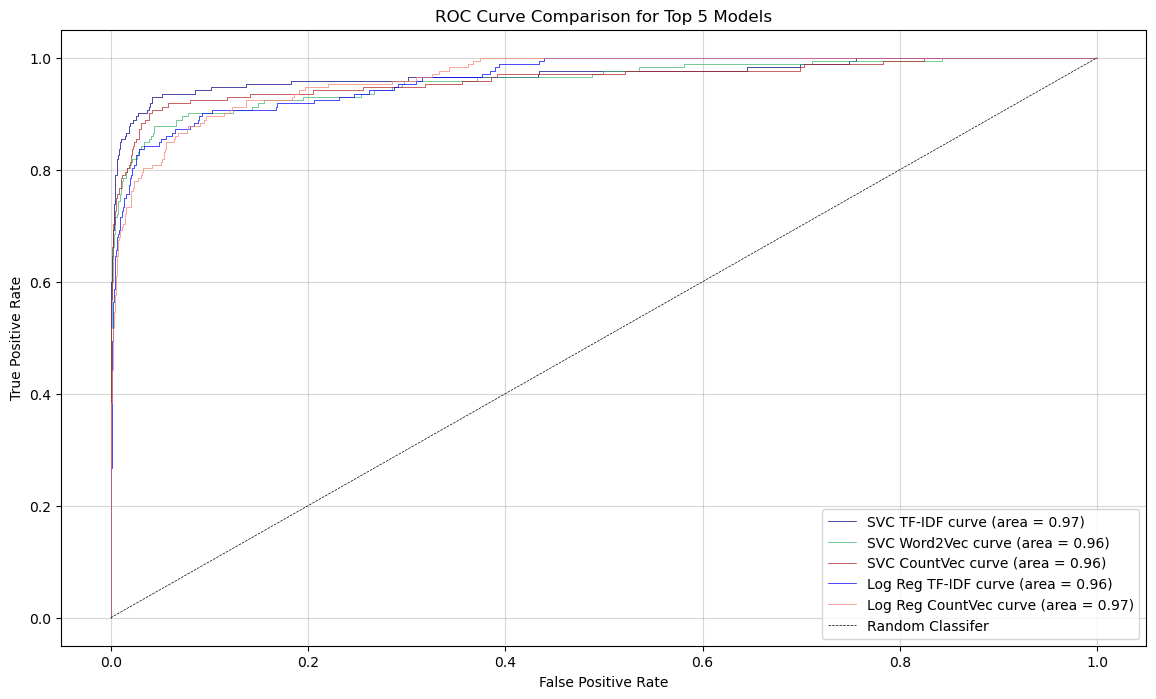

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image126.png
CPU times: total: 5.06 s
Wall time: 5.23 s


In [158]:
%%time
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
y_prob_04 = svc_search_tfidf.predict_proba(X_tfidf_test_pca)[:,1]
y_prob_05 = svc_search_word2vec.predict_proba(X_word2vec_test_pca)[:,1]
y_prob_06 = svc_search_cv.predict_proba(X_cv_test_pca)[:,1]
y_prob_10 = lg_search_tfidf.predict_proba(X_tfidf_test_pca)[:,1]
y_prob_12 = lg_search_cv.predict_proba(X_cv_test_pca)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr04, tpr04, _ = metrics.roc_curve(y_test, y_prob_04)
fpr05, tpr05, _ = metrics.roc_curve(y_test, y_prob_05)
fpr06, tpr06, _ = metrics.roc_curve(y_test, y_prob_06)
fpr10, tpr10, _ = metrics.roc_curve(y_test, y_prob_10)
fpr12, tpr12, _ = metrics.roc_curve(y_test, y_prob_12)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc04 = metrics.auc(fpr04, tpr04)
roc_auc05 = metrics.auc(fpr05, tpr05)
roc_auc06 = metrics.auc(fpr06, tpr06)
roc_auc10 = metrics.auc(fpr10, tpr10)
roc_auc12 = metrics.auc(fpr12, tpr12)

# Plot the ROC Curve
plt.figure(figsize =(14, 8))
lw = 0.5
plt.plot(fpr04, tpr04, color='navy', lw = lw, label = 'SVC TF-IDF curve (area = %0.2f)' % roc_auc04)
plt.plot(fpr05, tpr05, color='mediumseagreen', lw = lw, label = 'SVC Word2Vec curve (area = %0.2f)' % roc_auc05)
plt.plot(fpr06, tpr06, color='firebrick', lw = lw, label = 'SVC CountVec curve (area = %0.2f)' % roc_auc06)
plt.plot(fpr10, tpr10, color='blue', lw = lw, label = 'Log Reg TF-IDF curve (area = %0.2f)' % roc_auc10)
plt.plot(fpr12, tpr12, color='salmon', lw = lw, label = 'Log Reg CountVec curve (area = %0.2f)' % roc_auc12)
plt.plot([0, 1], [0, 1], color = 'black', lw = lw, linestyle = '--', label= 'Random Classifer')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Top 5 Models')
plt.legend(loc = "lower right")

save_plot_function(126)

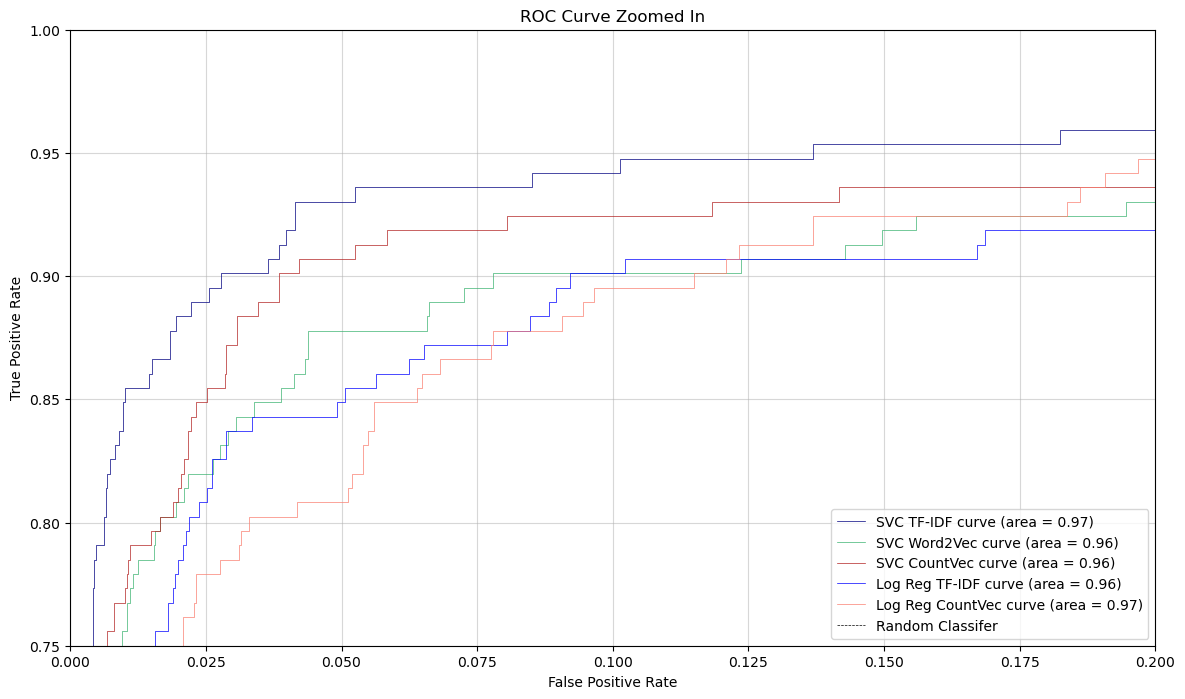

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image127.png
CPU times: total: 4.22 s
Wall time: 4.34 s


In [156]:
%%time
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
y_prob_04 = svc_search_tfidf.predict_proba(X_tfidf_test_pca)[:,1]
y_prob_05 = svc_search_word2vec.predict_proba(X_word2vec_test_pca)[:,1]
y_prob_06 = svc_search_cv.predict_proba(X_cv_test_pca)[:,1]
y_prob_10 = lg_search_tfidf.predict_proba(X_tfidf_test_pca)[:,1]
y_prob_12 = lg_search_cv.predict_proba(X_cv_test_pca)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr04, tpr04, _ = metrics.roc_curve(y_test, y_prob_04)
fpr05, tpr05, _ = metrics.roc_curve(y_test, y_prob_05)
fpr06, tpr06, _ = metrics.roc_curve(y_test, y_prob_06)
fpr10, tpr10, _ = metrics.roc_curve(y_test, y_prob_10)
fpr12, tpr12, _ = metrics.roc_curve(y_test, y_prob_12)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc04 = metrics.auc(fpr04, tpr04)
roc_auc05 = metrics.auc(fpr05, tpr05)
roc_auc06 = metrics.auc(fpr06, tpr06)
roc_auc10 = metrics.auc(fpr10, tpr10)
roc_auc12 = metrics.auc(fpr12, tpr12)

# Plot the ROC Curve
plt.figure(figsize =(14, 8))
lw = 0.5
plt.plot(fpr04, tpr04, color='navy', lw = lw, label = 'SVC TF-IDF curve (area = %0.2f)' % roc_auc04)
plt.plot(fpr05, tpr05, color='mediumseagreen', lw = lw, label = 'SVC Word2Vec curve (area = %0.2f)' % roc_auc05)
plt.plot(fpr06, tpr06, color='firebrick', lw = lw, label = 'SVC CountVec curve (area = %0.2f)' % roc_auc06)
plt.plot(fpr10, tpr10, color='blue', lw = lw, label = 'Log Reg TF-IDF curve (area = %0.2f)' % roc_auc10)
plt.plot(fpr12, tpr12, color='salmon', lw = lw, label = 'Log Reg CountVec curve (area = %0.2f)' % roc_auc12)
plt.plot([0, 1], [0, 1], color = 'black', lw = lw, linestyle = '--', label= 'Random Classifer')
plt.xlim([0.0, 0.2])
plt.ylim([0.75, 1.0])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Zoomed In')
plt.legend(loc = "lower right")

save_plot_function(127)